In [137]:
import cv2 as cv
from os import getcwd
from os.path import dirname
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [138]:
image = rf"{dirname(getcwd())}\Scan_above_hvs.jpg"
print(image)
assert image is not None, "image not found"

k:\python\opencv-extract-image\Scan_above_hvs.jpg


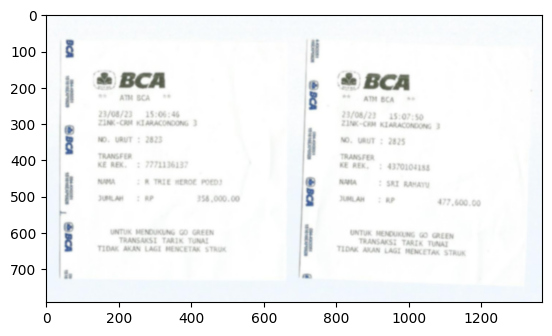

In [139]:
"""
Add gaussian blur to get rid of unnecessary edges
"""
cv_img = cv.imread(image)
img = cv_img.copy()
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
blur = cv.GaussianBlur(img_rgb, tuple(11 for _ in range(2)), 2)  # get rid of unnecessary edges
plt.imshow(blur)

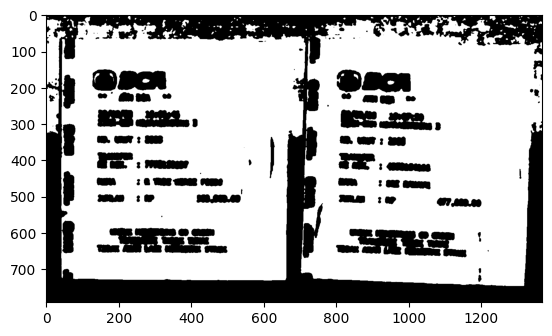

In [140]:
"""
Create a mask
"""
low = 249
max = 255
lower_thresh = tuple(low for _ in range(3))
max_thresh = tuple(max for _ in range(3))
mask = cv.inRange(blur, lower_thresh, max_thresh)
mask.shape
plt.imshow(mask, "gray")

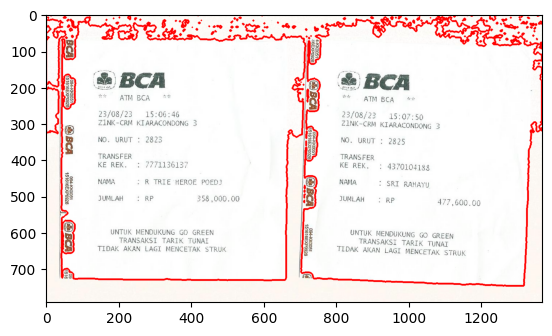

In [141]:
cont, hierarchy = cv.findContours(mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
cont_image = cv.drawContours(img, cont, -1, 255, 3)

plt.imshow(cont_image)